# Projeto

## Classification

## Random Forests Approach

In [1]:
import dslabs_functions as dslabs
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from matplotlib.pyplot import figure, savefig, show
import dslabs_functions as dslabs
import pandas as pd

file_tag = "Credit_Score"
## Train - resultado do balancing escolhido (over no nosso caso)
train_filename = "data_preparation_final_results_1/data_preparation_csvs/balancing_csvs/data_balancing_alt2_over.csv"
## ficheiro Teste ao qual nao fazemos balancing
test_filename = "data_preparation_final_results_1/data_preparation_csvs/feat_eng_csvs/test_data_feat_select_alt3_RFE.csv"
target = "Credit_Score"
# default
eval_metric = "accuracy"

trnX: np.ndarray
tstX: np.ndarray
trnY: np.array
tstY: np.array
labels: list
vars: list
trnX, tstX, trnY, tstY, labels, vars = dslabs.read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")
## normal depois de fazer o balancing, ter target ordenado 0 e 1's

Train#=113752 Test#=20000
Labels=[0.0, 1.0]


### Parameters Study

RF best for 100 trees (d=7 and f=0.3)


<Figure size 600x450 with 0 Axes>

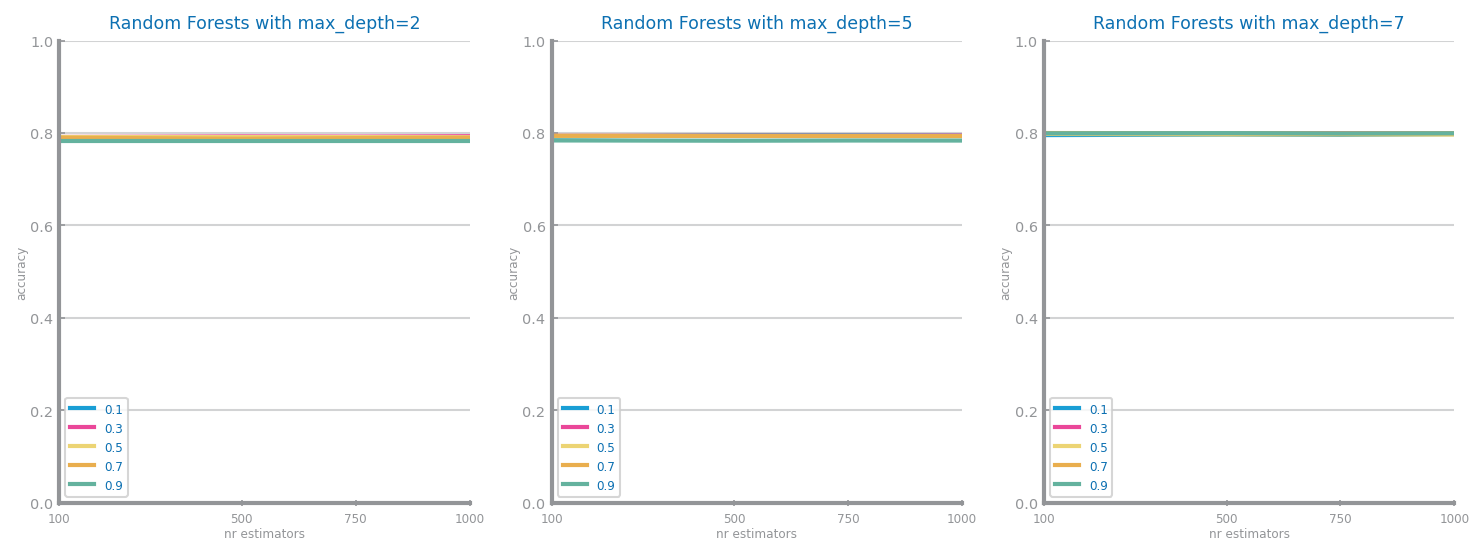

In [2]:
figure()
best_model, params = dslabs.random_forests_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_trees=1000,
    lag=250,
    metric=eval_metric,
)
savefig(f"classification_images/random_forests/{file_tag}_rf_{eval_metric}_study.png")
show()

RF best for 500 trees (d=7 and f=0.7)


<Figure size 600x450 with 0 Axes>

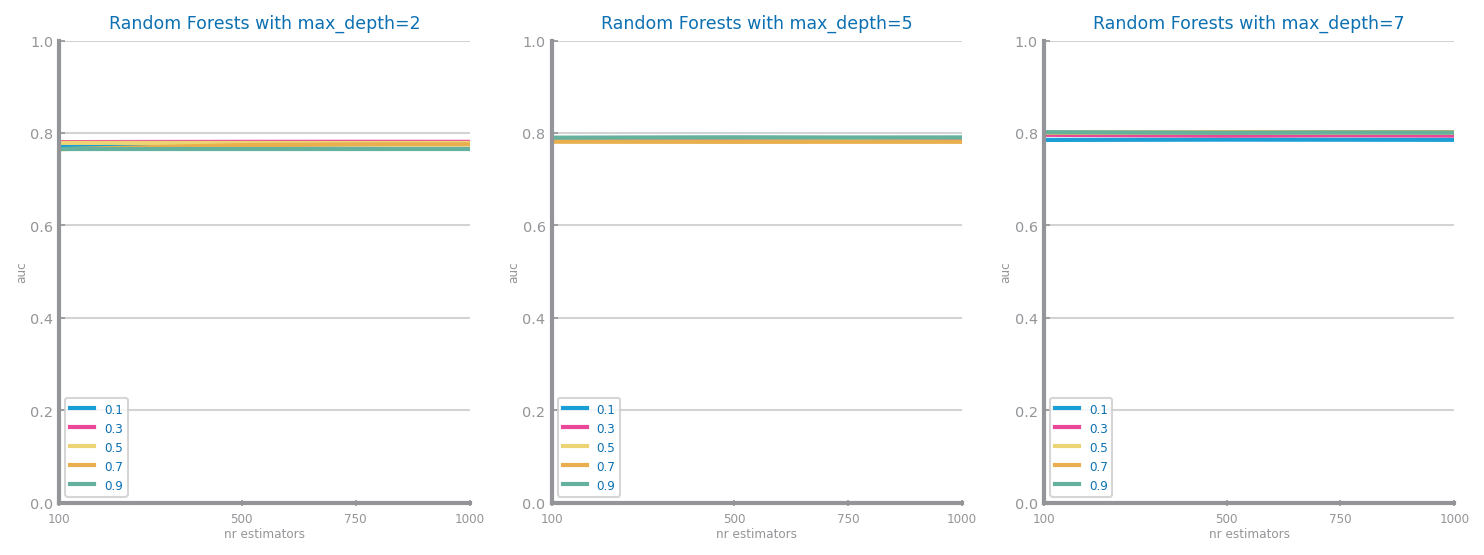

In [3]:
eval_metric="auc"
figure()
best_model, params = dslabs.random_forests_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_trees=1000,
    lag=250,
    metric=eval_metric,
)
savefig(f"classification_images/random_forests/{file_tag}_rf_{eval_metric}_study.png")
show()

RF best for 100 trees (d=7 and f=0.1)


<Figure size 600x450 with 0 Axes>

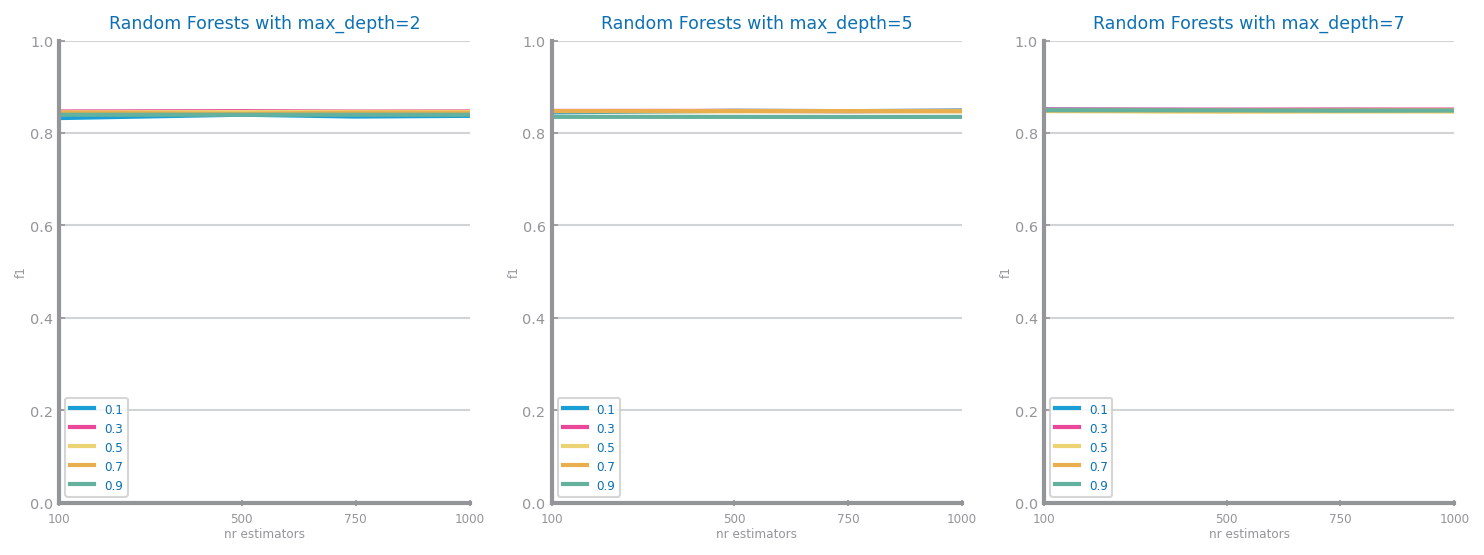

In [4]:
eval_metric="f1"
figure()
best_model, params = dslabs.random_forests_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_trees=1000,
    lag=250,
    metric=eval_metric,
)
savefig(f"classification_images/random_forests/{file_tag}_rf_{eval_metric}_study.png")
show()

RF best for 100 trees (d=5 and f=0.1)


<Figure size 600x450 with 0 Axes>

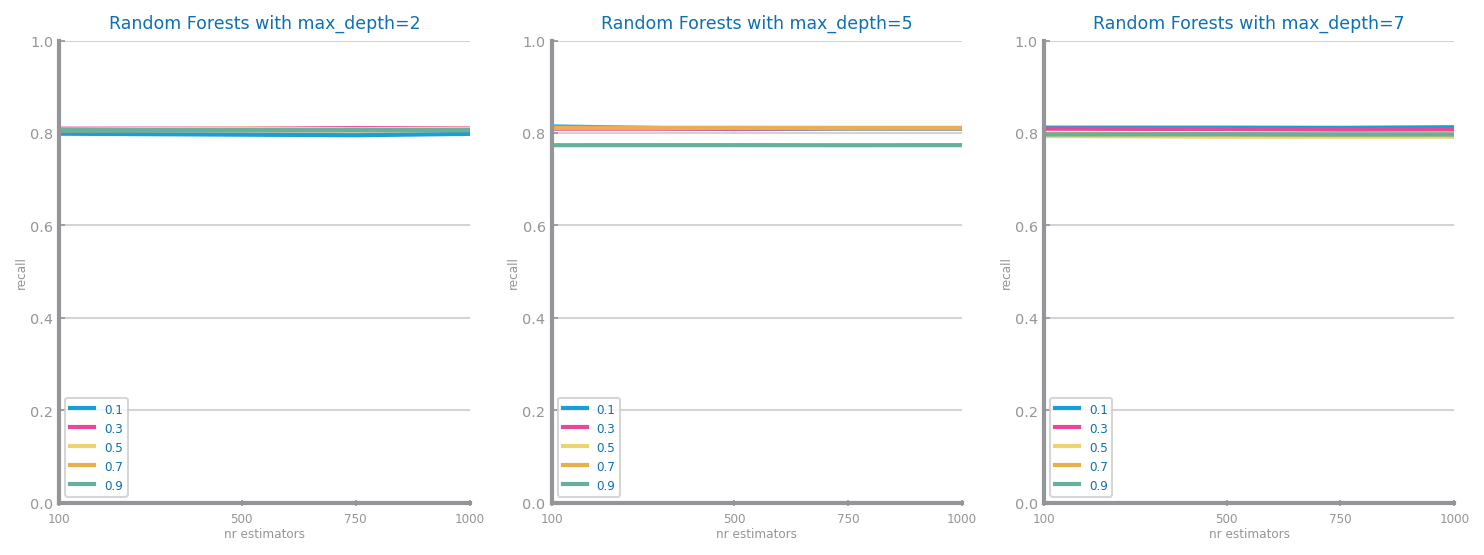

In [5]:
eval_metric="recall"
figure()
best_model, params = dslabs.random_forests_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_trees=1000,
    lag=250,
    metric=eval_metric,
)
savefig(f"classification_images/random_forests/{file_tag}_rf_{eval_metric}_study.png")
show()

<Figure size 600x450 with 0 Axes>

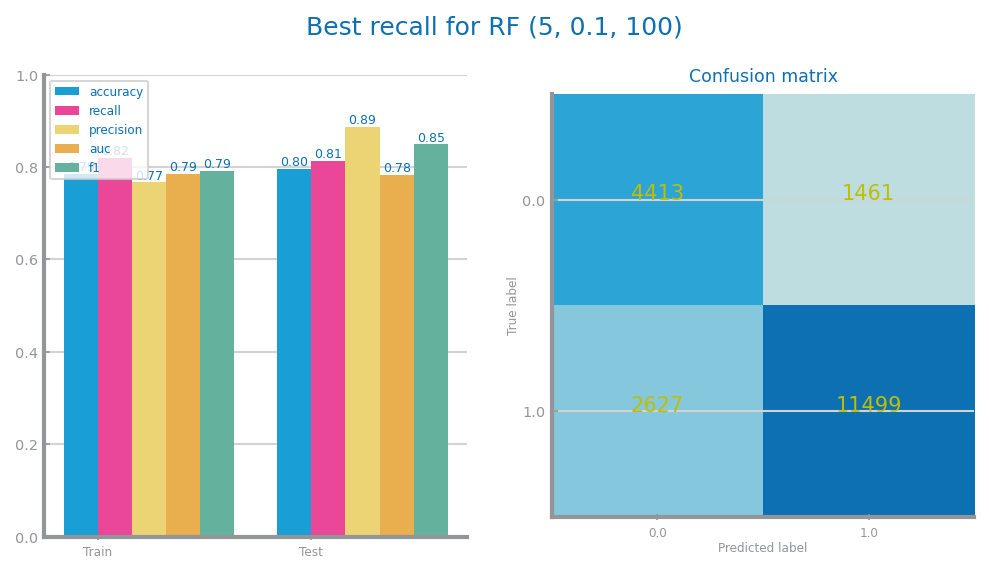

In [6]:
prd_trn: np.array = best_model.predict(trnX)
prd_tst: np.array = best_model.predict(tstX)
figure()
dslabs.plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'classification_images/random_forests/{file_tag}_rf_{params["name"]}_best_{params["metric"]}_eval.png')
show()

1. Interest_Rate (0.22471413234531967)
2. OutstandingDebt (0.1481274568109962)
3. CreditMix (0.1365539992596143)
4. NumCreditInquiries (0.10299847909604559)
5. Delay_from_due_date (0.07607067740779454)
6. Credit_History_Age (0.07537596827885709)
7. Num_Credit_Card (0.0665054305041239)
8. Num_Bank_Accounts (0.04069292192335481)
9. Payment_of_Min_Amount (0.031244056225149176)
10. Monthly_Inhand_Salary (0.019697192206535315)
11. Age (0.012267172300047407)
12. Auto Loan (0.010446501475344441)
13. Debt Consolidation Loan (0.010367745262901209)
14. ChangedCreditLimit (0.007482046219561411)
15. Not Specified Loan (0.007298130937977129)
16. Credit-Builder Loan (0.005817105988938927)
17. Payday Loan (0.0049632940492041755)
18. Student Loan (0.004556228663852578)
19. Mortgage Loan (0.004338065366687293)
20. Payment_Behaviour (0.003343506483578286)
21. Home Equity Loan (0.0027160018812814285)
22. Personal Loan (0.0023096618468042697)
23. Month (0.0008978063936587086)
24. Occupation (0.00075999580

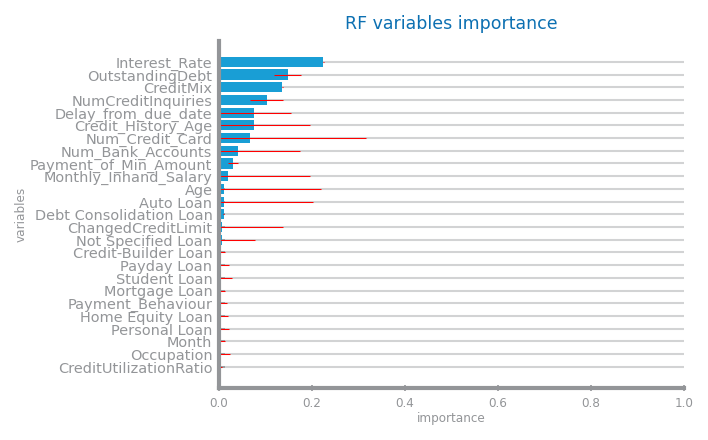

In [7]:
stdevs: list[float] = list(
    np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
)
importances = best_model.feature_importances_
indices: list[int] = np.argsort(importances)[::-1]
elems: list[str] = []
imp_values: list[float] = []
for f in range(len(vars)):
    elems += [vars[indices[f]]]
    imp_values.append(importances[indices[f]])
    print(f"{f+1}. {elems[f]} ({importances[indices[f]]})")

figure()
dslabs.plot_horizontal_bar_chart(
    elems,
    imp_values,
    error=stdevs,
    title="RF variables importance",
    xlabel="importance",
    ylabel="variables",
    percentage=True,
)
savefig(f"classification_images/random_forests/{file_tag}_rf_{eval_metric}_vars_ranking.png")

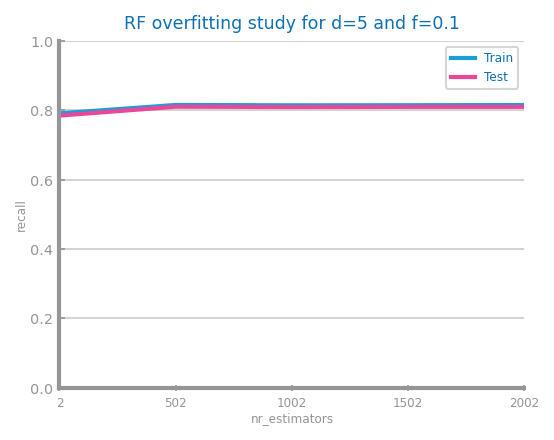

In [8]:
### Overfitting Study for Recall
from sklearn.ensemble import RandomForestClassifier

d_max: int = params["params"][0]
feat: float = params["params"][1]
nr_estimators: list[int] = [i for i in range(2, 2501, 500)]

y_tst_values: list[float] = []
y_trn_values: list[float] = []
acc_metric: str = "recall"

for n in nr_estimators:
    clf = RandomForestClassifier(n_estimators=n, max_depth=d_max, max_features=feat)
    clf.fit(trnX, trnY)
    prd_tst_Y: np.array = clf.predict(tstX)
    prd_trn_Y: np.array = clf.predict(trnX)
    y_tst_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
dslabs.plot_multiline_chart(
    nr_estimators,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"RF overfitting study for d={d_max} and f={feat}",
    xlabel="nr_estimators",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"classification_images/random_forests/{file_tag}_rf_{eval_metric}_overfitting.png")

RF best for 100 trees (d=7 and f=0.5)


<Figure size 600x450 with 0 Axes>

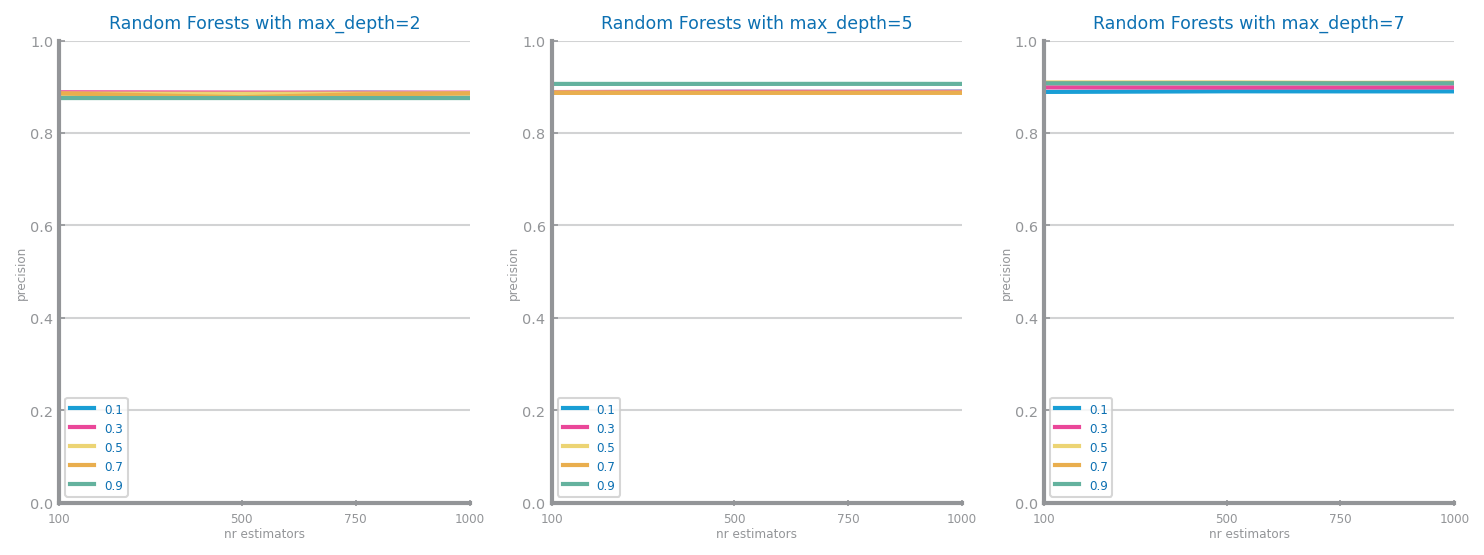

In [9]:
eval_metric="precision"
figure()
best_model, params = dslabs.random_forests_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_trees=1000,
    lag=250,
    metric=eval_metric,
)
savefig(f"classification_images/random_forests/{file_tag}_rf_{eval_metric}_study.png")
show()

<Figure size 600x450 with 0 Axes>

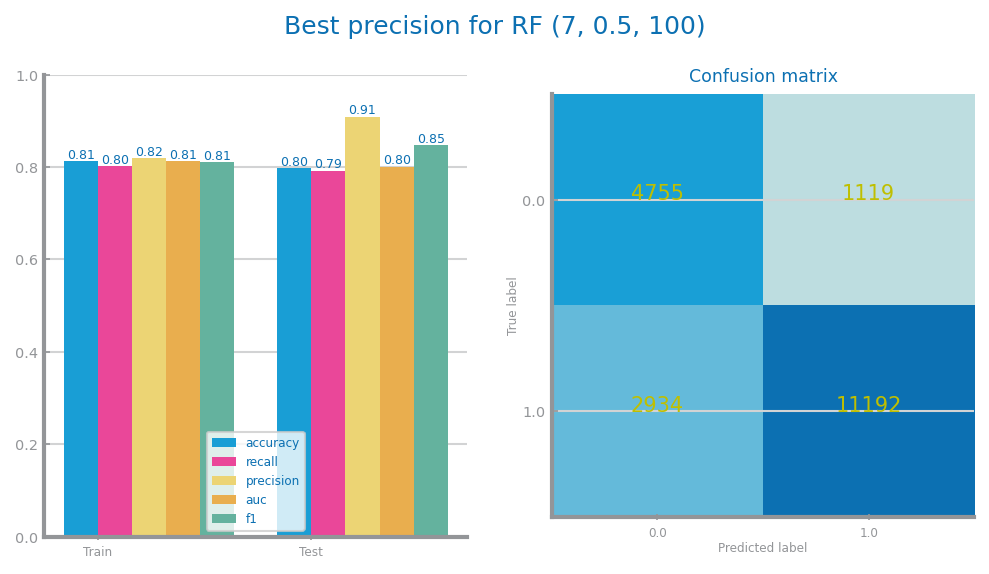

In [10]:
prd_trn: np.array = best_model.predict(trnX)
prd_tst: np.array = best_model.predict(tstX)
figure()
dslabs.plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'classification_images/random_forests/{file_tag}_rf_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### RF Variables Importance

1. OutstandingDebt (0.3658005847415648)
2. Interest_Rate (0.21294635971018797)
3. CreditMix (0.17802710356858595)
4. NumCreditInquiries (0.07518840882182981)
5. Delay_from_due_date (0.05275715799437413)
6. Num_Credit_Card (0.029369684487126766)
7. Credit_History_Age (0.024567553156197793)
8. ChangedCreditLimit (0.019883929928930733)
9. Num_Bank_Accounts (0.012614388779985265)
10. Month (0.006903196444547156)
11. Monthly_Inhand_Salary (0.004924111455497498)
12. Payment_of_Min_Amount (0.003913562186447714)
13. Age (0.002348960587766911)
14. Payment_Behaviour (0.0021398090009131106)
15. Occupation (0.0017661793868278038)
16. Credit-Builder Loan (0.000957853032090618)
17. CreditUtilizationRatio (0.0009460682576886882)
18. Personal Loan (0.000876009497741864)
19. Payday Loan (0.0006418320727812503)
20. Student Loan (0.0006300510716419956)
21. Debt Consolidation Loan (0.000624839018848215)
22. Home Equity Loan (0.0005941495828514661)
23. Mortgage Loan (0.0005868181240699037)
24. Auto Loan (0

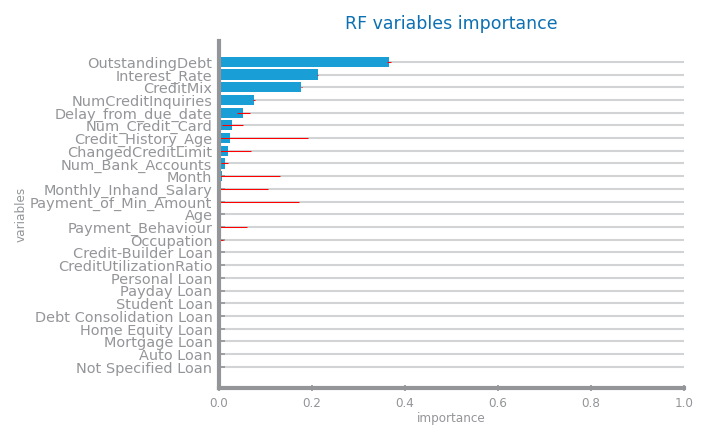

In [11]:
stdevs: list[float] = list(
    np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
)
importances = best_model.feature_importances_
indices: list[int] = np.argsort(importances)[::-1]
elems: list[str] = []
imp_values: list[float] = []
for f in range(len(vars)):
    elems += [vars[indices[f]]]
    imp_values.append(importances[indices[f]])
    print(f"{f+1}. {elems[f]} ({importances[indices[f]]})")

figure()
dslabs.plot_horizontal_bar_chart(
    elems,
    imp_values,
    error=stdevs,
    title="RF variables importance",
    xlabel="importance",
    ylabel="variables",
    percentage=True,
)
savefig(f"classification_images/random_forests/{file_tag}_rf_{eval_metric}_vars_ranking.png")

### Overfitting Study

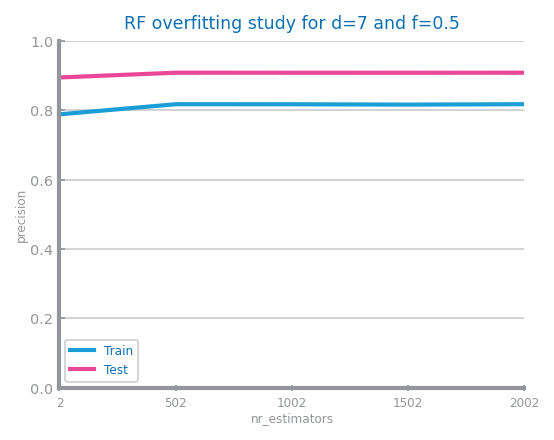

In [12]:
from sklearn.ensemble import RandomForestClassifier

d_max: int = params["params"][0]
feat: float = params["params"][1]
nr_estimators: list[int] = [i for i in range(2, 2501, 500)]

y_tst_values: list[float] = []
y_trn_values: list[float] = []
acc_metric: str = "precision"

for n in nr_estimators:
    clf = RandomForestClassifier(n_estimators=n, max_depth=d_max, max_features=feat)
    clf.fit(trnX, trnY)
    prd_tst_Y: np.array = clf.predict(tstX)
    prd_trn_Y: np.array = clf.predict(trnX)
    y_tst_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
dslabs.plot_multiline_chart(
    nr_estimators,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"RF overfitting study for d={d_max} and f={feat}",
    xlabel="nr_estimators",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"classification_images/random_forests/{file_tag}_rf_{eval_metric}_overfitting.png")